# Assignment 2 (90 marks)

## *The adverse health effects of air pollution - are we making any progress?*

<p><img src=files/air.jpg width="900"></p>
<p><strong>Credit:</strong>  <a href="https://www.flickr.com/people/44221799@N08/">Flickr/E4C</a> </p>

In [2]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
from folium.plugins import HeatMap


warnings.filterwarnings("ignore")  # Suppress all warnings

<h2>Introduction</h2>
<p><strong>Business Context.</strong> Air pollution is a very serious issue that the global population is currently dealing with. The abundance of air pollutants is not only contributing to global warming, but it is also causing problematic health issues to the population. There have been numerous efforts to protect and improve air quality across most nations. However, it seems that we are making very little progress. One of the main causes of this is the fact that the majority of air pollutants are derived from the burning of fossil fuels such as <em>coal</em>. Big industries and several other economical and political factors have slowed the progress towards the use of renewable energy by promoting the use of fossil fuels. Nevertheless, if we educate the general population and create awareness of this issue, we will be able to overcome this problem in the future.      </p>
<p>For this case, you have been hired as a data science consultant for an important environmental organization. In order to promote awareness of environmental and greenhouse gas issues, your client is interested in a study of <strong>plausible impacts of air contamination on the health of the global population</strong>. They have gathered some <em>raw</em> data provided by the <a href="https://www.who.int/">World Health Organization</a>, <a href="http://www.healthdata.org/">The Institute for Health Metrics and Evaluation</a> and the <a href="https://www.worldbank.org/">World Bank Group</a>. Your task is to conduct data analysis, search for potential information, and create visualizations that the client can use for their campaigns and grant applications. </p>
<p><strong>Analytical Context.</strong> You are given a folder, named <code>files</code> with <em>raw</em> data. This data contains quite a large number of variables and it is in a fairly disorganized state. In addition, one of the datasets contains very poor documentation, segmented into several datasets. Your objective will be to:</p>
<ol>
<li>Extract and clean the relevant data. You will have to manipulate several datasets to obtain useful information for the case. </li>
<li>Conduct Exploratory Data Analysis. You will have to create meaningful plots, formulate meaningful hypotheses and study the relationship between various indicators related to air pollution.</li>
</ol>
<p>Additionally, the client has some broad questions they would like to answer:<br />
1. Are we making any progress in reducing the amount of emitted pollutants across the globe?<br />
2. Which are the critical regions where we should start environmental campaigns?<br />
3. Are we making any progress in the prevention of deaths related to air pollution?<br />
4. Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </p>

<h2>Extracting and cleaning relevant data</h2>
<p>Let's take a look at the data provided by the client in the <code>files</code> folder. There, we see another folder  named <code>WDI_csv</code> with several CSV files corresponding to the World Bank's primary <a href="https://datacatalog.worldbank.org/dataset/world-development-indicators">World Development Indicators</a>. The client stated that this data may contain some useful information relevant to our study, but they have not told us anything aside from that. Thus, we are on our own in finding and extracting the relevant data for our study. This we will do next. </p>
<p>Let's take a peek at the file <code>WDIData.csv</code>:</p>

In [ ]:
WDI_data = pd.read_csv("./Data_files_for_A2/files/WDI_csv/WDIData.csv")
WDI_data.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN,NaN


<p>The data seems to have a large number of indicators dating from 1960. There are also columns containing country names and codes. Notice that the first couple of rows say <code>Arab World</code>, which may indicate that the data contains broad regional data as well. We notice also that there are at least 100,000 entries with <code>NaN</code> values for each year column.</p>
<p>Since we are interested in environmental indicators, we must get rid of any rows not relevant to our study. However, the number of indicators seems to be quite large and a manual inspection seems impossible. Let's load the file <code>WDISeries.csv</code> which seems to contain more information about the indicators:</p>

In [ ]:
WDI_ids = pd.read_csv("./Data_files_for_A2/files/WDI_csv/WDISeries.csv")
WDI_ids.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN


<p>Bingo! The <code>WDI_ids</code> DataFrame contains a column named <code>Topic</code>. Moreover, it seems that <em>Environment</em> is listed as a key topic in the column.</p>

<h3>Exercise 1 (4 marks):</h3>
<p>Extract all the rows that have the topic key <em>Environment</em> in <code>WDI_ids</code>. Add to the resulting DataFrame a new column named <code>Subtopic</code> which contains the corresponding subtopic of the indicator. For example, the subtopic of <code>Environment: Agricultural production</code> is <code>Agricultural production</code>. Which subtopics do you think are of interest to us?</p>
<p><strong>Hint:</strong> Remember that you can apply string methods to Series using the <code>str()</code> method of <code>pandas</code>. </p>

**Answer.**

In [5]:
WDI_ids['Topic'].apply(type).unique()

environment_df = WDI_ids[WDI_ids['Topic'].str.contains('Environment')]
environment_df['Subtopic'] = environment_df['Topic'].str.replace('Environment: ', '')
environment_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20,Subtopic
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare ...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,CC BY-4.0,NaN,Agricultural production
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Sum,...,NaN,"Food and Agriculture Organization, electronic ...",Agricultural land constitutes only a part of a...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,Agricultural land refers to the share of land ...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,"Food and Agriculture Organization, electronic ...",Agriculture is still a major sector in many ec...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,CC BY-4.0,NaN,Land use


We're interested in Emissions, Energy Production & Use, and Natural Resources Contribution to GDP. These are all closely linked to air pollution. Emissions mainly come from burning fossil fuels for energy, and by looking at how much economies rely on resources like coal, oil, and gas, we can identify which countries might be producing the most pollution. This helps us see where efforts to promote cleaner energy could have the biggest impact. 

-------

<h3>Exercise 2 (4 marks):</h3>
<p>Use the results of Exercise 1 to create a new DataFrame with the history of all emissions indicators for countries and major regions. Call this new DataFrame <code>Emissions_df</code>. How many emissions indicators are in the study?</p>

**Answer.**

In [ ]:
# Filter for emissions indicators from environment_df
emissions_indicators = environment_df[environment_df['Subtopic'] == 'Emissions']

# Merge emissions indicators with historical data from WDI_data
Emissions_df = WDI_data[WDI_data['Indicator Code'].isin(emissions_indicators['Series Code'])].reset_index(drop=True)

print(emissions_indicators.shape)
print(Emissions_df.shape)
Emissions_df.head()


(42, 22)
(11088, 65)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.757162,0.770413,0.737665,0.769023,NaN,NaN,NaN,NaN,NaN,NaN


There are 42 different emissions indicators included in this study, with a total of 11,088 historical data entries.

-------

--
--


<h3>Exercise 3 (4 marks):</h3>
<p>The DataFrame <code>Emissions_df</code> has one column per year of observation. Data in this form is usually referred to as data in <em>wide format</em>, as the number of columns is high. However, it might be easier to query and filter the data if we had a single column containing the year in which each indicator was calculated. This way, <em>each observation will be represented by a single row</em>. Use the <code>pandas</code> function <a href="https://pandas.pydata.org/docs/reference/api/pandas.melt.html"><code>melt()</code></a> to reshape the <code>Emissions_df</code> data into <em>long format</em>. The resulting DataFrame should contain a pair of new columns named <code>Year</code> and <code>Indicator Value</code>:</p>

**Answer.**

In [7]:
Emissions_long_df = pd.melt(
    Emissions_df,
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],  # Columns to keep
    var_name='Year',  # New column name for the years
    value_name='Indicator Value'  # New column name for the values
)

Emissions_long_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,1960,NaN
1,Arab World,ARB,Agricultural methane emissions (thousand metri...,EN.ATM.METH.AG.KT.CE,1960,NaN
2,Arab World,ARB,Agricultural nitrous oxide emissions (% of total),EN.ATM.NOXE.AG.ZS,1960,NaN
3,Arab World,ARB,Agricultural nitrous oxide emissions (thousand...,EN.ATM.NOXE.AG.KT.CE,1960,NaN
4,Arab World,ARB,CO2 emissions (kg per 2010 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,NaN
...,...,...,...,...,...,...
676363,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,Unnamed: 64,NaN
676364,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,Unnamed: 64,NaN
676365,Zimbabwe,ZWE,SF6 gas emissions (thousand metric tons of CO2...,EN.ATM.SF6G.KT.CE,Unnamed: 64,NaN
676366,Zimbabwe,ZWE,Total greenhouse gas emissions (% change from ...,EN.ATM.GHGT.ZG,Unnamed: 64,NaN


-------

--
--

<h3>Exercise 4 (4 marks):</h3>
<p>The column <code>Indicator Value</code> of the new <code>Emissions_df</code> contains a bunch of <code>NaN</code> values. Additionally, the <code>Year</code> column contains an <code>Unnamed: 64</code> value. What procedure should we follow to clean these missing values in our DataFrame? Proceed with your suggested cleaning process.</p>

**Answer.**

If the indicator value is NaN, that row becomes useless because we do not have the value for that year. In addition, if the year has a value of Unnamed: 64, it also becomes useless because we cannot use it to anaylse emissions over time.

In [ ]:
Emissions_df_clean = Emissions_long_df[Emissions_long_df['Indicator Value'].notna()].reset_index(drop=True)
Emissions_df_clean = Emissions_df_clean[Emissions_df_clean['Year'] != 'Unnamed: 64'].reset_index(drop=True)

Emissions_df_clean

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59535.396567
1,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.645736
2,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292
3,Arab World,ARB,CO2 emissions from liquid fuel consumption (% ...,EN.ATM.CO2E.LF.ZS,1960,84.851473
4,Arab World,ARB,CO2 emissions from liquid fuel consumption (kt),EN.ATM.CO2E.LF.KT,1960,50539.802737
...,...,...,...,...,...,...
325853,Zimbabwe,ZWE,"PM2.5 air pollution, population exposed to lev...",EN.ATM.PM25.MC.ZS,2017,100.000000
325854,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T1.ZS,2017,0.000000
325855,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T2.ZS,2017,8.066920
325856,Zimbabwe,ZWE,"PM2.5 pollution, population exposed to levels ...",EN.ATM.PM25.MC.T3.ZS,2017,100.000000


-------

--
--
--
--


<h3>Exercise 5 (4 marks):</h3>
<p>Split the <code>Emissions_df</code> into two DataFrames, one containing only countries and the other containing only regions. Name these <code>Emissions_C_df</code> and <code>Emissions_R_df</code> respectively.</p>
<p><strong>Hint:</strong> You may want to inspect the file <code>WDICountry.csv</code> for this task. Region country codes may be found by looking at <code>null</code> values of the <code>Region</code> column in <code>WDICountry</code>.</p>

**Answer.**

In [9]:
WDICountry_df = pd.read_csv('./Data_files_for_A2/files/WDI_csv/WDICountry.csv')

regions_codes = WDICountry_df[WDICountry_df['Region'].isnull()]['Country Code'].tolist()
countries_codes = WDICountry_df[WDICountry_df['Region'].notnull()]['Country Code'].tolist()

Emissions_C_df = Emissions_df_clean[Emissions_df_clean['Country Code'].isin(countries_codes)].reset_index(drop=True)
Emissions_R_df = Emissions_df_clean[Emissions_df_clean['Country Code'].isin(regions_codes)].reset_index(drop=True)


-------

<h2>Finalizing the cleaning for our study</h2>
<p>Our data has improved a lot by now. However, since the number of indicators is still quite large, let us focus our study on the following indicators for now:</p>
<ul>
<li>
<p><strong>Total greenhouse gas emissions (kt of CO2 equivalent), EN.ATM.GHGT.KT.CE</strong>: The total of greenhouse emissions includes CO2, Methane, Nitrous oxide, among other pollutant gases. Measured in kilotons.</p>
</li>
<li>
<p><strong>CO2 emissions (kt), EN.ATM.CO2E.KT</strong>: Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.  </p>
</li>
<li>
<p><strong>Methane emissions (kt of CO2 equivalent), EN.ATM.METH.KT.CE</strong>: Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.</p>
</li>
<li>
<p><strong>Nitrous oxide emissions (kt of CO2 equivalent), EN.ATM.NOXE.KT.CE</strong>: Nitrous oxide emissions are emissions from agricultural biomass burning, industrial activities, and livestock management.</p>
</li>
<li>
<p><strong>Other greenhouse gas emissions, HFC, PFC and SF6 (kt of CO2 equivalent), EN.ATM.GHGO.KT.CE</strong>: Other pollutant gases.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, mean annual exposure (micrograms per cubic meter), EN.ATM.PM25.MC.M3</strong>: Population-weighted exposure to ambient PM2.5 pollution is defined as the average level of exposure of a nation's population to concentrations of suspended particles measuring less than 2.5 microns in aerodynamic diameter, which are capable of penetrating deep into the respiratory tract and causing severe health damage. Exposure is calculated by weighting mean annual concentrations of PM2.5 by population in both urban and rural areas.</p>
</li>
<li>
<p><strong>PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total), EN.ATM.PM25.MC.ZS</strong>: Percent of population exposed to ambient concentrations of PM2.5 that exceed the World Health Organization (WHO) guideline value.</p>
</li>
</ul>

--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--


<h3>Exercise 6 (5 marks) :</h3>
<p>For each of the emissions DataFrames, extract the rows corresponding to the above indicators of interest. Replace the long names of the indicators by the short names <code>Total</code>, <code>CO2</code>, <code>CH4</code>, <code>N2O</code>, <code>Other</code>, <code>PM2.5</code>, and <code>PM2.5_WHO</code>. (This will be helpful later when we need to label plots of our data.) </p>

**Answer.**

In [236]:
main_indicators = ['Total', 'CO2', 'CH4', 'N2O', 'Other', 'PM2.5', 'PM2.5_WHO']

Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.GHGT.KT.CE', 'Indicator Name'] = 'Total'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.CO2E.KT', 'Indicator Name'] = 'CO2'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.METH.KT.CE', 'Indicator Name'] = 'CH4'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.NOXE.KT.CE', 'Indicator Name'] = 'N2O'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.GHGO.KT.CE', 'Indicator Name'] = 'Other'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.PM25.MC.M3', 'Indicator Name'] = 'PM2.5'
Emissions_C_df.loc[Emissions_C_df['Indicator Code'] == 'EN.ATM.PM25.MC.ZS', 'Indicator Name'] = 'PM2.5_WHO'

Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.GHGT.KT.CE', 'Indicator Name'] = 'Total'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.CO2E.KT', 'Indicator Name'] = 'CO2'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.METH.KT.CE', 'Indicator Name'] = 'CH4'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.NOXE.KT.CE', 'Indicator Name'] = 'N2O'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.GHGO.KT.CE', 'Indicator Name'] = 'Other'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.PM25.MC.M3', 'Indicator Name'] = 'PM2.5'
Emissions_R_df.loc[Emissions_R_df['Indicator Code'] == 'EN.ATM.PM25.MC.ZS', 'Indicator Name'] = 'PM2.5_WHO'

Emissions_C_df = Emissions_C_df[Emissions_C_df['Indicator Name'].isin(main_indicators)]
Emissions_R_df = Emissions_R_df[Emissions_R_df['Indicator Name'].isin(main_indicators)]
Emissions_R_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Indicator Value
0,Arab World,ARB,CO2,EN.ATM.CO2E.KT,1960,5.953540e+04
6,Caribbean small states,CSS,CO2,EN.ATM.CO2E.KT,1960,5.878201e+03
12,Central Europe and the Baltics,CEB,CO2,EN.ATM.CO2E.KT,1960,4.665334e+05
26,Early-demographic dividend,EAR,CO2,EN.ATM.CO2E.KT,1960,5.821834e+05
40,East Asia & Pacific,EAS,CO2,EN.ATM.CO2E.KT,1960,1.210072e+06
...,...,...,...,...,...,...
62897,Sub-Saharan Africa (IDA & IBRD countries),TSS,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2017,1.000000e+02
62898,Upper middle income,UMC,PM2.5,EN.ATM.PM25.MC.M3,2017,3.874829e+01
62899,Upper middle income,UMC,PM2.5_WHO,EN.ATM.PM25.MC.ZS,2017,9.606507e+01
62900,World,WLD,PM2.5,EN.ATM.PM25.MC.M3,2017,4.552186e+01


-------

<h2>Where shall the client start environmental campaigns?</h2>
<p>Now the DataFrames <code>Emissions_C_df</code> and <code>Emissions_R_df</code> seem to be in a good shape. Let's proceed to conduct some exploratory data analysis so that we can make recommendations to our client.</p>

<h3>Exercise 7 (15 marks):</h3>
<p>Let's first calculate some basic information about the main indicators across the globe.</p>
<h4>7.1 (5 marks)</h4>
<p>Compute some basic statistics of the amount of kt of emissions for each of the four main pollutants (<code>CO2, CH4, N2O, Others</code>) over the years. Use the <code>Emissions_C_df</code> data frame. What trends do you see? </p>

**Answer.**

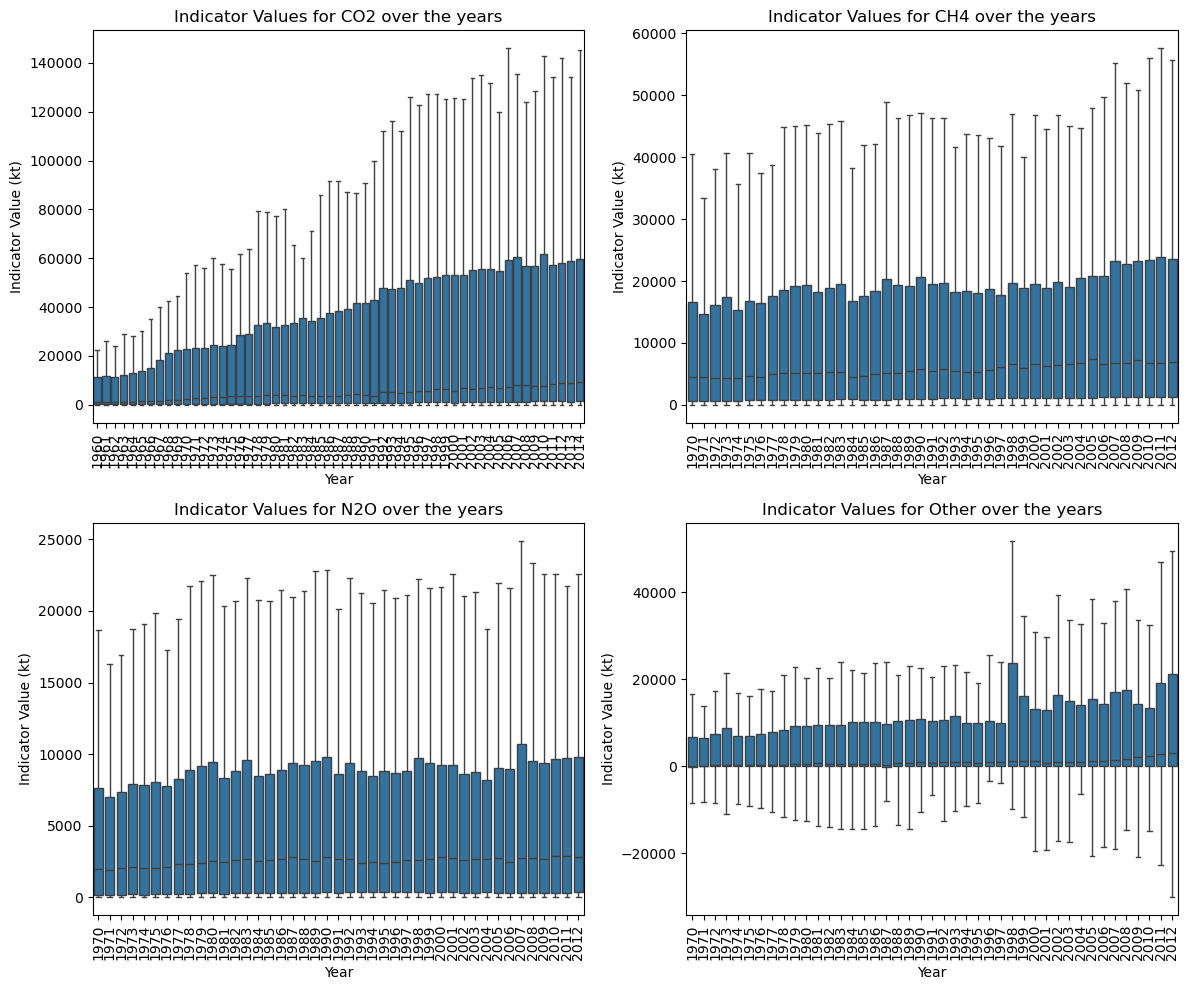

In [242]:
main_pollutants = ['CO2', 'CH4', 'N2O', 'Other']

temp_emissions_C_df = Emissions_C_df[Emissions_C_df['Indicator Name'].isin(main_pollutants)]

temp_emissions_C_df = temp_emissions_C_df.sort_values(by='Year', ascending=True)

temp_emissions_C_df['Year'] = temp_emissions_C_df['Year'].astype(int)
plt.figure(figsize=(12, 10))

for i, var in enumerate(main_pollutants):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=temp_emissions_C_df[temp_emissions_C_df['Indicator Name'] == var], x='Year', y='Indicator Value', showfliers=False)
    
    plt.xticks(rotation=90)
    plt.xlabel('Year')
    plt.ylabel('Indicator Value (kt)')
    plt.title('Indicator Values for ' + var + ' over the years')

plt.tight_layout()
plt.show()


-------

<h4>7.2 (3 marks)</h4>
<p>What can you say about the <em>distribution</em> of emissions around the globe over the years? What information can you extract from the <em>tails</em> of these distributions over the years?</p>

**Answer.**

CO2, CH4, N2O and Other emissions have increaesed over the years with the Others category producing emissions unsteadily while CO2, CH4, and N2O emissions increase steadily over the years.

The median for the all boxplots over the years have not changed. In addition, the IQR have not changed much over years except for the CO2 emissions.

CO2: The upper whiskers increase over time which means that there are countries which are producing significantly more than others. For example, China is a major manufacturer so it would make sense that China us burning significantly more fossil fuels than countries like Vietnam and the UK. The lower whiskers which remained constant as the years went on indicates that there are some countries which are maintaining their fossil fuels emissions. The increase in IQR indicates that upper indicator values are becoming more spread out.

CH4 and N2O: The upper whiskers increase slighty to no increase at all over time with the IQR remaining relatively constant as time goes by. Additionally, the lower whiskers did not change over time so there are countries which are producing very little CH4 emissions. Overall, there are not many major changes over time for CH4 emissions. However, the median for N2O emissions is higher than the median for CH4 emissions. 

Other: The upper whiskers begin to increase after early 1990's with the IQR and median increasing proportionally. Additionally, the lower whiskers decreased (negative emissions produced which means they removed the emissions from the atmosphere).

Overall, the boxplot suggests CH4 emissions to be the highest as the median is greater than CO2, N2O and Other emissions. But this cannot be confirmed as the CO2 boxplot contains data from 1960 (which the other boxplots do not) and have the greatest upper whisker values which can influence the sum of emissions produced over the years.


-------

<h4>7.3 (7 marks)</h4>
<p>Compute a plot showing the behavior of each of the four main air pollutants for each of the main global regions in the <code>Emissions_R_df</code> data frame. The main regions are <code>'Latin America &amp; Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe &amp; Central Asia', 'Middle East &amp; North Africa', 'East Asia &amp; Pacific'</code> and <code>'North America'</code>. What conclusions can you make?</p>

**Answer.**

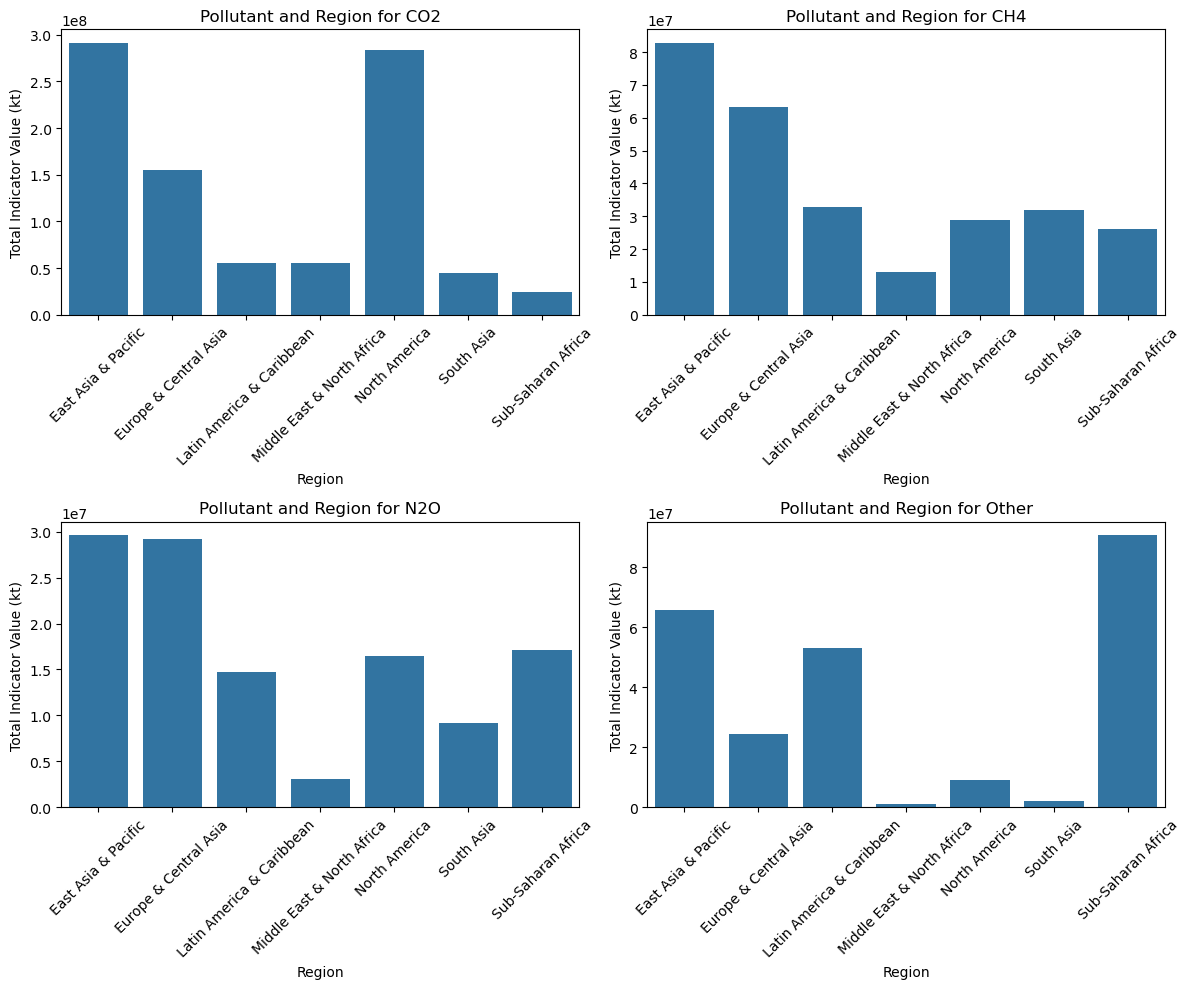

In [ ]:
main_pollutants = ['CO2', 'CH4', 'N2O', 'Other']
main_region = ['Latin America & Caribbean', 
               'South Asia', 
               'Sub-Saharan Africa', 
               'Europe & Central Asia', 
               'Middle East & North Africa', 
               'East Asia & Pacific',
               'North America']


temp_emissions_R_df = Emissions_R_df[Emissions_R_df['Country Name'].isin(main_region)]
temp_emissions_R_df = temp_emissions_R_df[temp_emissions_R_df['Indicator Name'].isin(main_pollutants)]

temp_emissions_R_df = temp_emissions_R_df.sort_values(by='Year', ascending=True)

temp_emissions_R_df['Year'] = temp_emissions_R_df['Year'].astype(int)

bar_plot_data = temp_emissions_R_df.groupby(['Indicator Name', 'Country Name'])['Indicator Value'].sum().reset_index()

plt.figure(figsize= (12, 10))
for i, var in enumerate(main_pollutants):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data = bar_plot_data[bar_plot_data['Indicator Name'] == var], x='Country Name', y='Indicator Value')
    plt.xticks(rotation=45)
    plt.xlabel('Region')
    plt.ylabel('Total Indicator Value (kt)')
    plt.title('Pollutant and Region for ' + var)
    plt.tight_layout()

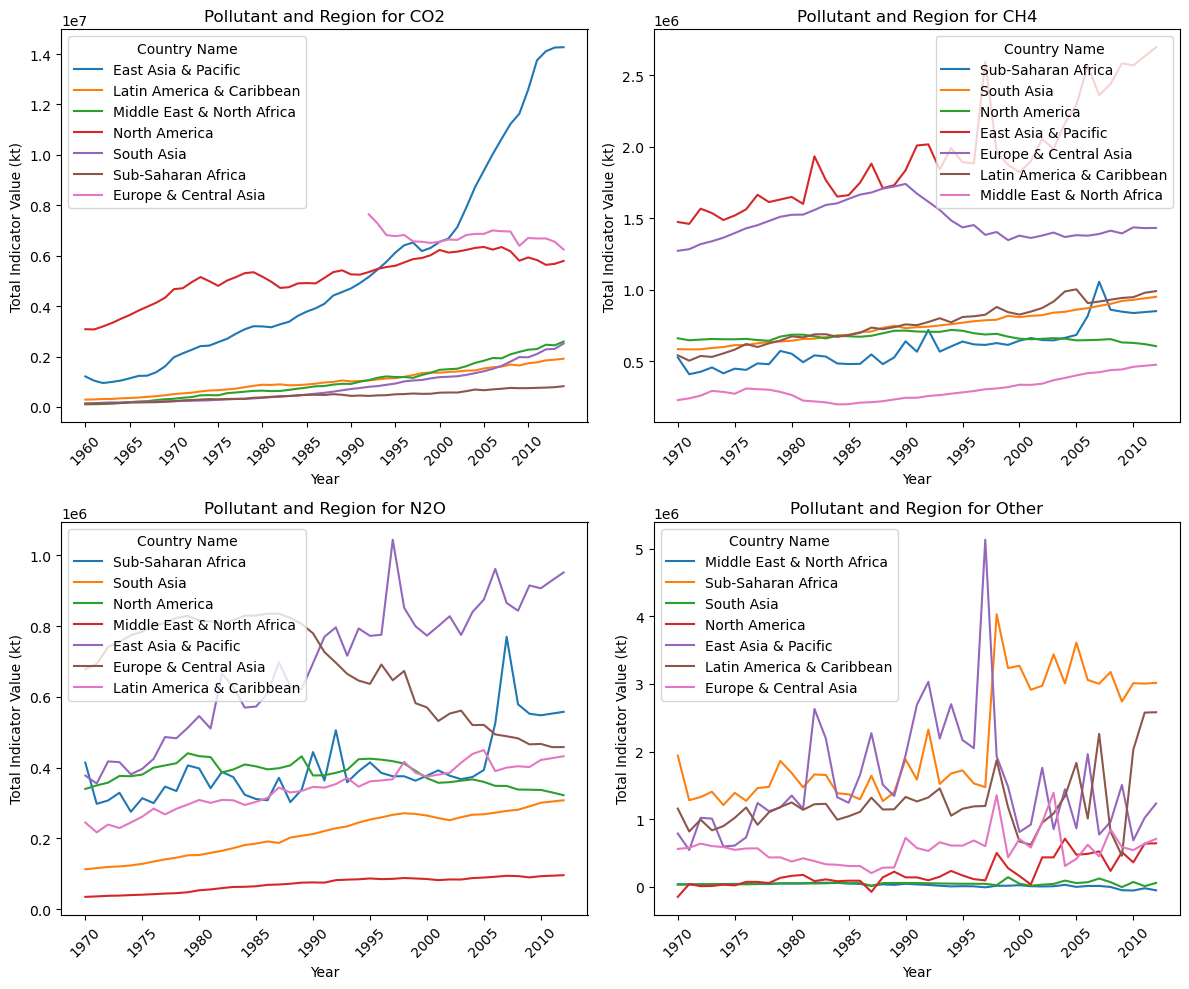

In [14]:
plt.figure(figsize= (12, 10))
for i, var in enumerate(main_pollutants):
    plt.subplot(2, 2, i + 1)
    sns.lineplot(data = temp_emissions_R_df[temp_emissions_R_df['Indicator Name'] == var], x='Year', y='Indicator Value', hue='Country Name')
    min_x = temp_emissions_R_df[temp_emissions_R_df['Indicator Name'] == var]['Year'].min()
    max_x = temp_emissions_R_df[temp_emissions_R_df['Indicator Name'] == var]['Year'].max()
    plt.xticks(ticks=range(min_x, max_x + 1, 5) , rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Total Indicator Value (kt)')
    plt.title('Pollutant and Region for ' + var)
    
plt.tight_layout()

In [15]:
temp_emissions_R_df[(temp_emissions_R_df['Country Name'] == 'Europe & Central Asia') & (temp_emissions_R_df['Indicator Name'] == 'CO2')].sum()

Country Name       Europe & Central AsiaEurope & Central AsiaEuro...
Country Code       ECSECSECSECSECSECSECSECSECSECSECSECSECSECSECSE...
Indicator Name     CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2CO2C...
Indicator Code     EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...
Year                                                           46069
Indicator Value                                      155534545.53982
dtype: object

-------

<p>It seems that countries in East Asia and the Pacific are the worst dealing with pollutant emissions. We also see that Europe and Central Asia have been making some efforts to reduce their emissions. Surprisingly this is not the case with North America and Sub-Saharan Africa, which levels have been increasing over the years as well. </p>

<h3>Exercise 8  (10 marks):</h3>
<p>In Exercise 7 we discovered some interesting features of the distribution of the emissions over the years. Let us explore these features in more detail. </p>

<h4>8.1 (5 marks)</h4>
<p>Which are the top five countries that have been in the top 10 of <code>CO2</code> emitters over the years? Have any of these countries made efforts to reduce the amount of CO2 emissions over the last 10 years?</p>

**Answer.**

In [16]:
CO2_Emissions_C_df = Emissions_C_df[Emissions_C_df['Indicator Name'] == 'CO2'].reset_index(drop=True) #EN.ATM.CO2E.KT
CO2_Emissions_C_df_grouped = CO2_Emissions_C_df.groupby(['Year', 'Country Name'])['Indicator Value'].sum().reset_index()

top_10_emit = CO2_Emissions_C_df_grouped.groupby('Year').apply(lambda x: x.nlargest(10, 'Indicator Value')).reset_index(drop=True)

top_10_emit['Rank'] = top_10_emit.index + 1
top_10_emit['Rank'] = top_10_emit['Rank'] % 10
top_10_emit.loc[top_10_emit['Rank'] == 0, 'Rank'] = 10 

top_10_emit_count = top_10_emit['Country Name'].value_counts().reset_index()

top_5 = top_10_emit_count[:5]

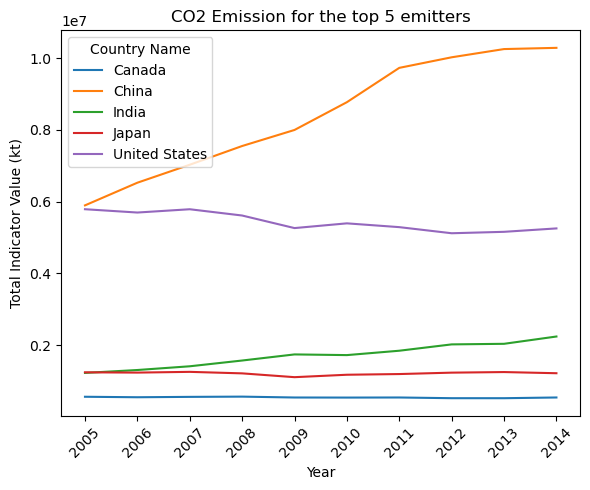

In [17]:
threshold = CO2_Emissions_C_df['Year'].astype(int).max() - 10
last_10_years_df = CO2_Emissions_C_df[CO2_Emissions_C_df['Year'].astype(int) > threshold].reset_index(drop=True) 
# We use > instead of >= because that would be last 11 years.

top_5_last_10_years = last_10_years_df[last_10_years_df['Country Name'].isin(top_5['Country Name'])].reset_index(drop=True)

plt.figure(figsize= (6, 5))
sns.lineplot(data = top_5_last_10_years, x='Year', y= 'Indicator Value', hue='Country Name')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Indicator Value (kt)')
plt.title('CO2 Emission for the top 5 emitters')
plt.tight_layout()

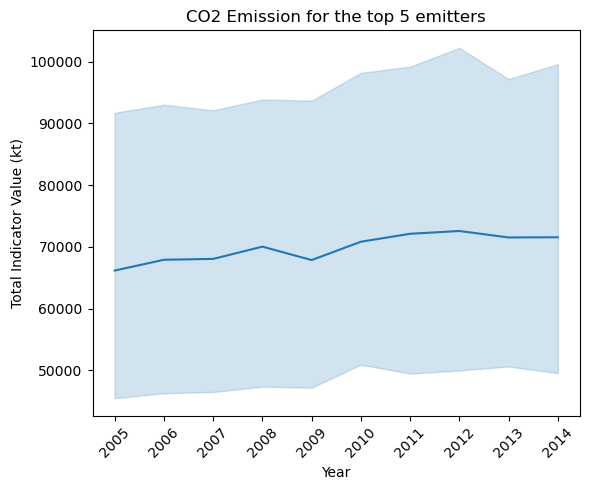

In [18]:
last_10_years_df = CO2_Emissions_C_df[CO2_Emissions_C_df['Year'].astype(int) > threshold].reset_index(drop=True) 
last_10_years_no_top_5_df = last_10_years_df[~last_10_years_df['Country Name'].isin(['China', 'United States', 'India', 'Japan', 'Canada'])]
# Source for using ~: https://stackoverflow.com/questions/14057007/remove-rows-not-isinx

plt.figure(figsize= (6, 5))
sns.lineplot(data = last_10_years_no_top_5_df, x='Year', y= 'Indicator Value', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Indicator Value (kt)')
plt.title('CO2 Emission for the top 5 emitters')
plt.tight_layout()

-------

<h4>8.2  (5 marks)</h4>
<p>Are these five countries carrying out the burden of most of the emissions emitted over the years globally? Can we say that the rest of the world is making some effort to control their polluted gasses emissions over the years?</p>

**Answer.**

From the line graph above, it can be concluded that China and the United States are emitting the most CO2. While the United States CO2 emissions remain constant over the years, they are still emitting a lot of CO2. On the other hand, China is emitting more CO2 as the years go on. Canada, Japan and India have emitted significantly less CO2 compared to China and the US, although India is starting to emit more over the years. However, These three countries do not emit as much as the top 2. When we take out the main contributers, we see that the rest of the countries do not produce as much CO2 with maybe an exception of one other country. The majority of these countries have a constant or minimal increase of CO2 contribution over the years. To answer the question, I would say that the rest of the world is making some effort to control their polluted gas emissions over the years. This is because although there may be a slight increase of CO2 contribution over the years, it is important to note that as the years go on, Earth's population increases as well so this is reasonable. According to Wikipedia, around 83 million people are born each year so this very slight increase of CO2 emission is enough to say that the rest of the world is making some effort to control their emissions.

-------

<h2>The health impacts of air pollution</h2>

<h3>Exercise 9  (10 marks):</h3>
<p>One of the main contributions of poor health from air pollution is particulate matter. In particular, very small particles (those with a size less than 2.5 micrometres ($\mu$m)) can enter and affect the respiratory system. The <code>PM2.5</code> indicator measures the average level of exposure of a nation's population to concentrations of these small particles. The <code>PM2.5_WHO</code> measures the  percentage of the population who are exposed to ambient concentrations of these particles that exceed some thresholds set by the World Health Organization (WHO). In particular, countries with a higher <code>PM2.5_WHO</code> indicator are more likely to suffer from bad health conditions. </p>
<h4>9.1  (7 marks)</h4>
<p>The client would like to know if there is any relationship between the <code>PM2.5_WHO</code> indicator and the level of income of the general population, as well as how this changes over time. What plot(s) might be helpful to solve the client's question?  What conclusion can you draw from your plot(s) to answer their question?</p>
<p><strong>Hint:</strong> The DataFrame <code>WDI_countries</code> contains a column named <code>Income Group</code>. </p>

**Answer.**

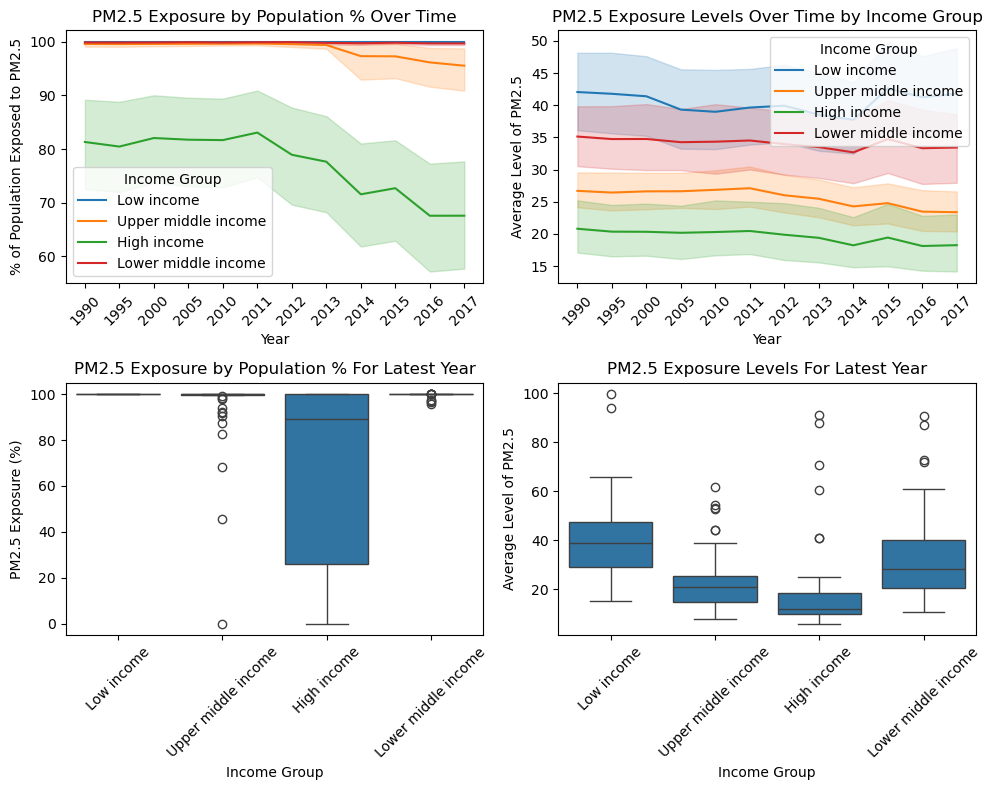

In [20]:
WDICountry_df.rename(columns={'Table Name' : 'Country Name'}, inplace=True)

PM_WHO_df = Emissions_C_df[Emissions_C_df['Indicator Name'] == 'PM2.5_WHO']
# This has 2328 rows

PM_WHO_df = Emissions_C_df[Emissions_C_df['Indicator Name'] == 'PM2.5_WHO'].merge(WDICountry_df[['Country Name', 'Income Group']], on='Country Name')
# This has 2292 so we lost 36 data points. After researching, it seems that the merge function drops the NA values, so we do not have to worry about cleaning the df

PM_df = Emissions_C_df[Emissions_C_df['Indicator Name'] == 'PM2.5']

PM_df = Emissions_C_df[Emissions_C_df['Indicator Name'] == 'PM2.5'].merge(WDICountry_df[['Country Name', 'Income Group']], on='Country Name')

# Line plots
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
sns.lineplot(data=PM_WHO_df, x='Year', y='Indicator Value', hue='Income Group')
plt.xlabel('Year')
plt.ylabel('% of Population Exposed to PM2.5')
plt.title('PM2.5 Exposure by Population % Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2,2,2)
sns.lineplot(data=PM_df, x='Year', y='Indicator Value', hue='Income Group')
plt.xlabel('Year')
plt.ylabel('Average Level of PM2.5')
plt.title('PM2.5 Exposure Levels Over Time by Income Group')
plt.xticks(rotation=45)
plt.tight_layout()

# Box plots
plt.subplot(2,2,3)
sns.boxplot(data=PM_WHO_df[PM_WHO_df['Year'] == PM_WHO_df['Year'].max()], x='Income Group', y='Indicator Value')
plt.xlabel('Income Group')
plt.ylabel('PM2.5 Exposure (%)')
plt.title('PM2.5 Exposure by Population % For Latest Year')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(2,2,4)
sns.boxplot(data=PM_df[PM_df['Year'] == PM_df['Year'].max()], x='Income Group', y='Indicator Value')
plt.xlabel('Income Group')
plt.ylabel('Average Level of PM2.5')
plt.title('PM2.5 Exposure Levels For Latest Year')
plt.xticks(rotation=45)
plt.tight_layout()


A line plot as well as a bar plot can be used to solve this clients problem. As we want to analyse change over time, a line plot best suits this task. In addition, if we want to analyse this more specifically for a given year, a boxplot would best suit this task.

Analysis: 

There is a correlation between the PM2.5_WHO indicator and the level of income of the general population. From the plots, it can be seen that the low and upper low income group has a higher exposure in terms of population percentage. This trend can also be observed for the upper middle income group, although after 2013, they seem to be getting less exposure in terms of population percentage. The high income group experiences significantly less exposure by population percentage compared to the rest of the groups. Over time, the exposure in terms of population percentage for low and lower middle income group do not change. However, there is a noticable change over time for the high income and upper middle income group. 

When we look at the average level of expousre (PM2.5), the higher classes are less exposed to the particle matter. As expected, the high income group had the lowest levels followed by the upper middle, lower middle, and finally the low income class. Generally, the groups seem to get less exposure as the years go on with maybe an exception for the low income class which seems to have gotten worse over time.

For the box plots for the latest year, it can be seen that the low income group has only 100% for exposure population percentage while the upper middle income and lower middle income have some outliers, though the majority of upper middle income and lower middle income countries have an exposure percentage of 100.

Additionally, our box plot for Exposure Levels For the Current Year are very similar to our line plot for Exposure Levels Over Time by Income Group. In both plots, they agree that the high income have the lowest exposure levels and the lower income classes have higher exposure levels. These two graphs reflect each other even though one is a representation over time and the over is a careful analysis for a single year.

In conclusion, there is a correlation between income groups and exposure levels as well as exposure in terms of population percentage as shown in the plots.


-------

<h4>9.2  (3 marks)</h4>
<p>What do you think are the causes behind the results in Exercise 9.1?</p>

**Answer.**

Higher-income countries put a lot into pollution control tech and have rules that cut down on emissions from factories and cars, which leads to lower PM2.5 levels. On the other hand, lower-income countries might not have the resources or motivation to put these rules in place, so their emissions tend to be higher.

In addition, higher income countries could utilize more clean energy resources. For example, higher income countries would have the resources to invest in clean renewable energy transportation compared to the lower class countries which may not have enough resources to invest in this.

As such, lower income countries would not have much resources for health compared to high income countries. This means that there is a possibility that lower income countries are less aware of the negative effects of particle matter. On the other hand, the high income countries would be more aware of the negative effects and take actions to minimize the exposure to these particle matter.

All in all, it comes down to the fact that high income countries are more developed, hence, smarter and have access to more resources than the lower income countries.

-------

<h3>Exercise 10  (30 marks):</h3>
<p>Finally, our client is interested in investigating the impacts and relationships between <strong>high levels of exposure to particle matter</strong> and <strong>the health of the population</strong>. Coming up with additional data for this task may be infeasible for the client, thus they have asked us to search for relevant health data in the <code>WDIdata.csv</code> file and work with that. </p>

<h4>10.1  (4 marks)</h4>
<p>Which indicators present in the file  <code>WDISeries.csv</code> file might be useful to solve the client's question? Explain.</p>
<p><strong>Note:</strong> Naming one or two indicators is more than enough for this question. </p>

**Answer.**

`PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)` and `Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)`

Agricultural machinery, tractors

In [24]:
filtered_indicators_1 = WDI_ids[WDI_ids['Indicator Name'].str.contains('PM2.5', case=False)]
filtered_indicators_2 = WDI_ids[WDI_ids['Indicator Name'].str.contains('mortality rate', case=False)]

# This is to look for the indicators
filtered_indicators_1['Indicator Name'].unique()
filtered_indicators_2['Indicator Name'].unique()

array(['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-1 value (% of total)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-2 value (% of total)',
       'PM2.5 pollution, population exposed to levels exceeding WHO Interim Target-3 value (% of total)',
       'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)'],
      dtype=object)

-------

<h4>10.2  (4 marks)</h4>
<p>Use the indicators provided in Exercise 10.1 to give valuable information to the client. </p>

In [95]:
level_exposure_df = WDI_data[WDI_data['Indicator Name'] == 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)']

mortality_rate = WDI_data[WDI_data['Indicator Name'] == 'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)']


level_exposure_df_long = pd.melt(
    level_exposure_df,
    id_vars= ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],  # Columns to keep
    var_name='Year',  # New column name for the years
    value_name='Indicator Value'  # New column name for the values
)
level_exposure_df_long = level_exposure_df_long[level_exposure_df_long['Indicator Value'].notna()]


mortality_rate_df_long = pd.melt(
    mortality_rate,
    id_vars= ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],  # Columns to keep
    var_name='Year',  # New column name for the years
    value_name='Indicator Value'  # New column name for the values
)
mortality_rate_df_long = mortality_rate_df_long[mortality_rate_df_long['Indicator Value'].notna()]

mortality_rate_df_long = mortality_rate_df_long.rename(columns={'Indicator Value' : 'Mortality Value'})
level_exposure_df_long = level_exposure_df_long.rename(columns={'Indicator Value' : 'Exposure Value'})
relationship_df = level_exposure_df_long.merge(mortality_rate_df_long[['Country Name', 'Year', 'Mortality Value']], on=['Country Name', 'Year'])
relationship_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Exposure Value,Mortality Value
0,Arab World,ARB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,58.764905,101.932592
1,Caribbean small states,CSS,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,19.102378,42.299061
2,Central Europe and the Baltics,CEB,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,17.641086,42.037222
3,Early-demographic dividend,EAR,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,59.870180,142.558914
4,East Asia & Pacific,EAS,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,2016,39.520542,105.033765


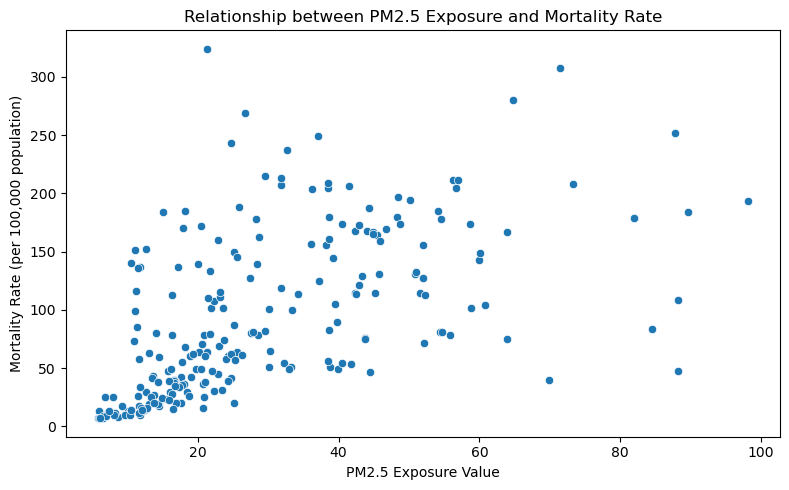

In [100]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=relationship_df, x='Exposure Value', y='Mortality Value', legend=False)

plt.xlabel('PM2.5 Exposure Value')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.title('Relationship between PM2.5 Exposure and Mortality Rate')
plt.tight_layout()
plt.show()

In [94]:
np.corrcoef(relationship_df['Exposure Value'], relationship_df['Mortality Value'])[0,1]

0.5690273206908255

From the plots and correlation coeffient, there is a moderate relationship between the PM2.5 Exposure and Mortality of a population. The majority of the data points are clumped in the lower exposure and lower mortality rate values.

**Answer.**

-------

<h4>10.3  (4 marks)</h4>
<p>Extend the analysis above to find some countries of interest. These are defined as</p>
<ul>
<li>The countries that have a high mortality rate due to household and ambient air pollution, but with low PM2.5 exposure</li>
<li>The countries that have a low mortality rate due to household and ambient air pollution, but with high PM2.5 exposure</li>
</ul>

**Answer.**

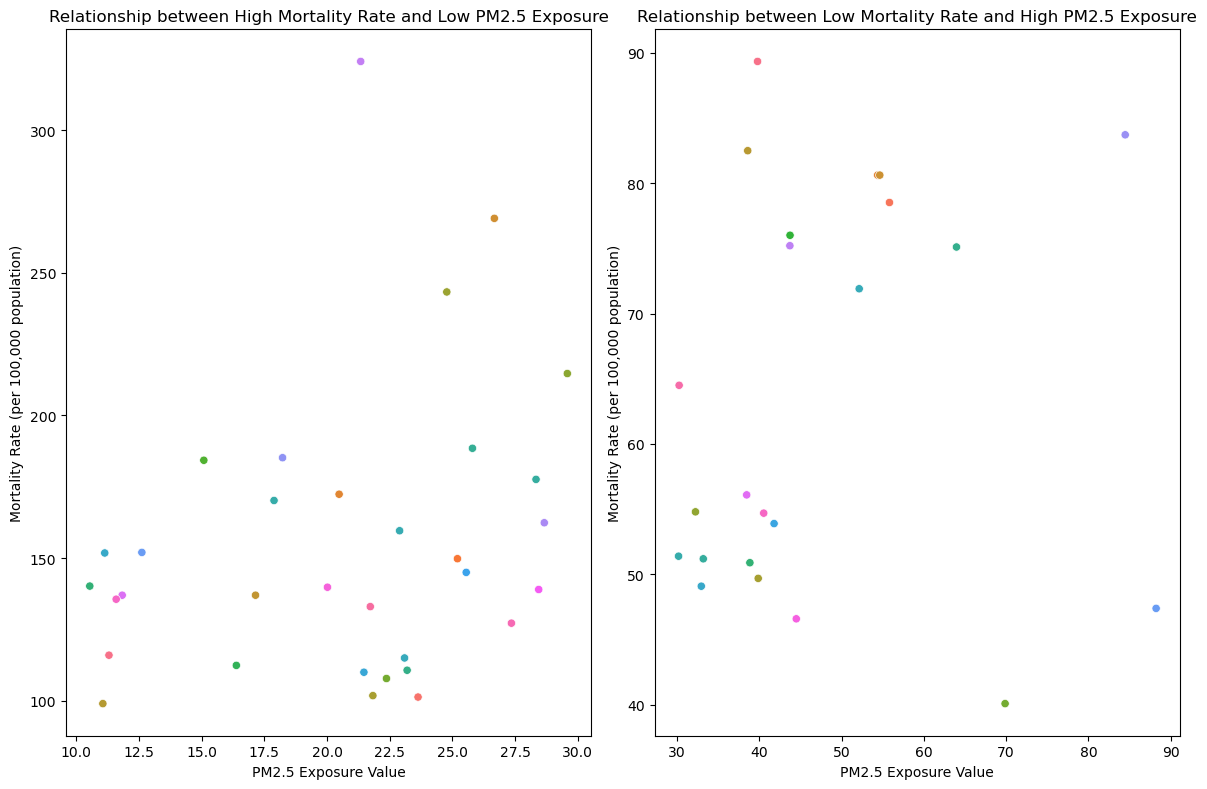

In [214]:
high_mortality_low_exposure = relationship_df[
    (relationship_df['Mortality Value'] > relationship_df['Mortality Value'].mean()) &
    (relationship_df['Exposure Value'] < relationship_df['Exposure Value'].mean())
]

low_mortality_high_exposure = relationship_df[
    (relationship_df['Mortality Value'] < relationship_df['Mortality Value'].mean()) &
    (relationship_df['Exposure Value'] > relationship_df['Exposure Value'].mean())
]

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.scatterplot(data=high_mortality_low_exposure, x='Exposure Value', y='Mortality Value', hue='Country Name', legend=False)
plt.xlabel('PM2.5 Exposure Value')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.title('Relationship between High Mortality Rate and Low PM2.5 Exposure')
plt.tight_layout()

plt.subplot(1,2,2)
sns.scatterplot(data=low_mortality_high_exposure, x='Exposure Value', y='Mortality Value', hue='Country Name', legend=False)
plt.xlabel('PM2.5 Exposure Value')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.title('Relationship between Low Mortality Rate and High PM2.5 Exposure')
plt.tight_layout()

Although both plots look identical, they both have different x and y axes.

Text(0.5, 0, 'Country Group')

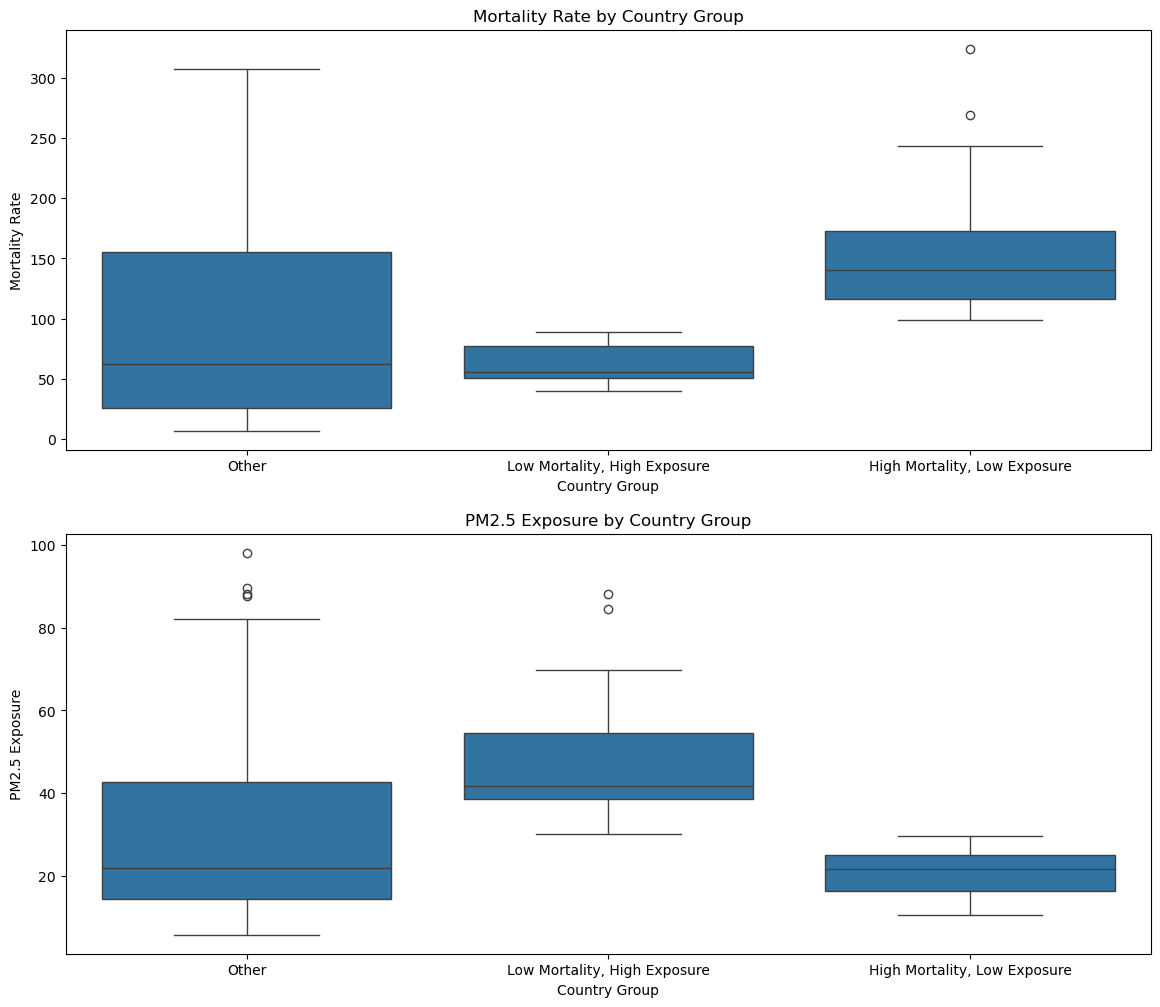

In [215]:

relationship_df['Group'] = 'Other'
relationship_df.loc[high_mortality_low_exposure.index, 'Group'] = 'High Mortality, Low Exposure'
relationship_df.loc[low_mortality_high_exposure.index, 'Group'] = 'Low Mortality, High Exposure'

# Plot box plots
plt.figure(figsize=(14, 12))
plt.subplot(2,1,1)
sns.boxplot(data=relationship_df, x='Group', y='Mortality Value')
plt.title('Mortality Rate by Country Group')
plt.ylabel('Mortality Rate')
plt.xlabel('Country Group')

plt.subplot(2,1,2)
sns.boxplot(data=relationship_df, x='Group', y='Exposure Value')
plt.title('PM2.5 Exposure by Country Group')
plt.ylabel('PM2.5 Exposure')
plt.xlabel('Country Group')


*Mortality Rate*

From the box plots, the 'Other' category (Not low mortality, high exposure or high mortality, low exposure) has the largest spread. This group covers the low mort. low exp. as well as high mort. high exp, hence, they cover the miniumum and maximum quantiles. Even with the high mortality low exposure group, the third quantile does not extend as much as the 'Other' group. This means that there are countries which have very high mortality but also higher exposure. In addition, there are countries in the 'Other' group with lower first quantiles than the lower mortality, high exposure group so that means there exists some countries with low mortality and low exposure. 

*PM2.5 Exposure* 

These box plots align with the mortality rate box plots with the same analysis as the mortality rate analysis.

In [182]:
relationship_df[relationship_df['Group'] == 'Other']['Country Name'] # United States, Urguay, Venezuela
relationship_df[relationship_df['Group'] == 'Low Mortality, High Exposure']['Country Name'] # Iraq, Morocco, Qater
relationship_df[relationship_df['Group'] == 'High Mortality, Low Exposure']['Country Name'] # Indonesia, Cambodia, Fiji

35     Pacific island small states
67                        Botswana
74                        Cambodia
82                         Comoros
86                   Cote d'Ivoire
100                       Eswatini
102                           Fiji
107                        Georgia
113                         Guinea
114                  Guinea-Bissau
115                         Guyana
116                          Haiti
121                      Indonesia
132                       Kiribati
136                Kyrgyz Republic
137                        Lao PDR
140                        Lesotho
141                        Liberia
145                     Madagascar
146                         Malawi
154          Micronesia, Fed. Sts.
159                     Mozambique
161                        Namibia
173               Papua New Guinea
176                    Philippines
184          Sao Tome and Principe
189                   Sierra Leone
193                Solomon Islands
207                 

Some examples of low mortality, high exposure countries are: Iraq, Morocco, Qater

Some examples of high mortality, low exposure countries are: Indonesia, Cambodia, Fiji

Some exmaple of high mortality and high exposure OR low mortality and low exposure are: United States, Urguay, Venezuela

-------

<h4>10.4  (10 marks)</h4>
<p>Finally, we want to look at the mortality data by income. We expect higher income countries to have lower pollution-related mortality. Find out if this assumption holds. Calculate summary statistics and histograms for each income category and note any trends.</p>

**Answer.**

                     count       mean        std        min        25%  \
Income Group                                                             
High income           52.0  19.154392  18.383447   5.893757   9.577464   
Low income            30.0  41.239516  18.725755  15.086483  28.729144   
Lower middle income   44.0  33.333828  19.675835  10.537839  20.366521   
Upper middle income   54.0  23.984927  12.244161   7.972429  15.150137   

                           50%        75%        max  
Income Group                                          
High income          13.140280  19.199308  88.222447  
Low income           38.949131  47.878078  98.054714  
Lower middle income  28.075590  38.511605  89.672177  
Upper middle income  21.785379  26.081576  63.954796  


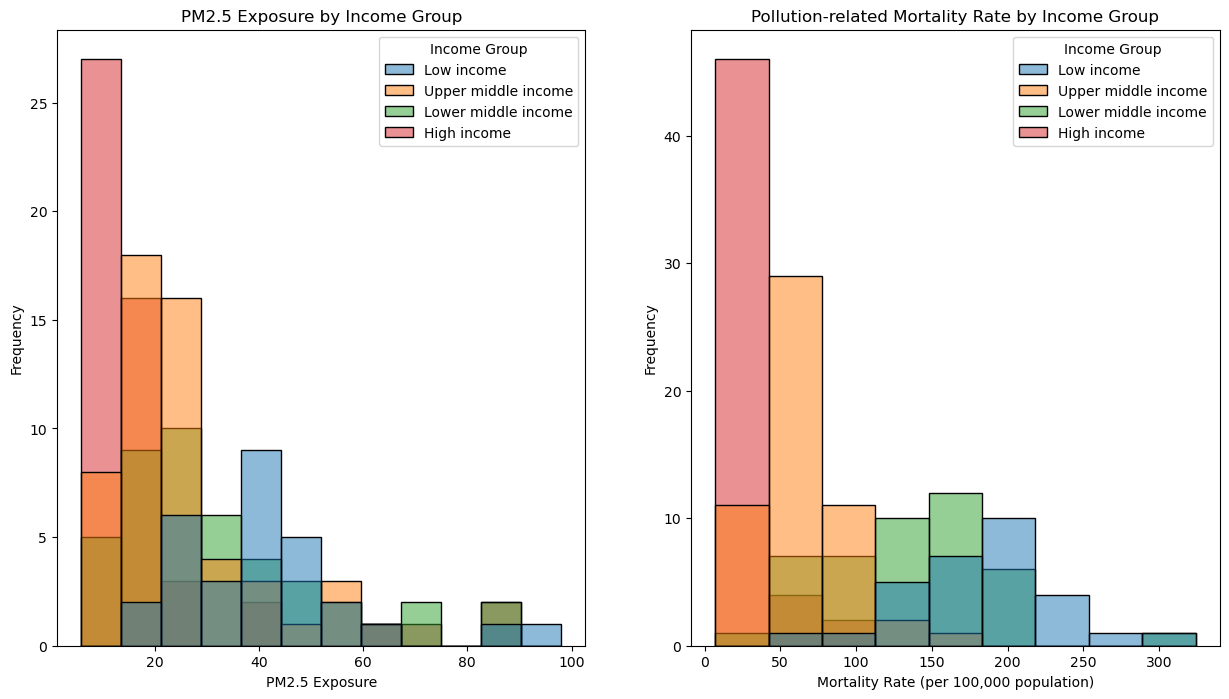

In [211]:
temp_df = level_exposure_df_long.merge(mortality_rate_df_long[['Country Name', 'Year', 'Mortality Value']], on=['Country Name', 'Year'])
temp_df = temp_df.merge(WDICountry_df[['Country Name', 'Income Group']], on='Country Name', how='left')

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.histplot(data=temp_df, x='Exposure Value', hue='Income Group')
plt.title('PM2.5 Exposure by Income Group')
plt.xlabel('PM2.5 Exposure')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(data=temp_df, x='Mortality Value', hue='Income Group')
plt.title('Pollution-related Mortality Rate by Income Group')
plt.xlabel('Mortality Rate (per 100,000 population)')
plt.ylabel('Frequency')

summary_stats = temp_df.groupby('Income Group')['Exposure Value'].describe()
print(summary_stats)

We can observe from the plots that higher income countries are less exposed to PM2.5 and the lower income countries are significantly more exposed. The higher income countries have a lower mortality rate than the low income countries which is expected as they have more resources and better healthcare.  

-------

<h4>10.5  (8 marks)</h4>
<p>At the start, we asked some questions. Based on your analysis, provide a short answer to each of these:</p>
<ol>
<li>Are we making any progress in reducing the amount of emitted pollutants across the globe?</li>
<li>Which are the critical regions where we should start environmental campaigns?</li>
<li>Are we making any progress in the prevention of deaths related to air pollution?</li>
<li>Which demographic characteristics seem to correlate with the number of health-related issues derived from air pollution? </li>
</ol>

**Answer.**

1. Our plots and analysis in question 7 suggests that we are not making any progress in reducing the amount of emmited pollutants across the globe. However, we do see that some regions are reducing the amount of emiited pollutants. However, these efforts are overpowered by countries like China and the US which emit significantly more than the rest of the countries. Looking at the graph, it could be seen that the third largest CO2 emitter is closer to emitting the same amount as the fifth largest CO2 emitter than the leading 2. Matter of fact, 2nd to 5th largest CO2 emitter emits less combined than the first, China. The plot I am specifically referring to Q8.1. All this to say, some countries are making effort but the leading countries in the world are simply emitting way more that the reduction of other countries cannot make up for it.

2. We should start environmental campaigns in East Asia & Pacific as well as Europe and Central Asia. They almost emit the most CO2, CH4, N2O, and other pollutants. South Asia have also been doing a great job managing their emissions but they should still be encouraged to reduce it. All regions except for Latin America & Carribean should have a campaign. But, the more critical regions that we should start an environmental campaign for is East Asia & Pacific as they as the main drivers of emissions. It can also be seen that other regions have a specific pollutant in which they prefer to use. For example, North American is typcially below the median value except for CO2; Sub-Saharan Africa emits one of the least emissions for all pollutants except for 'Other.'

3. No, we are not making progress in the prevention of deaths related to air pollution. From our plot in Q10.2, we get a moderate correlation between the increase of PM2.5 exposure and increase of mortality rate. In an ideal world, we would want a correlation coefficent of 0 and the mortalitiy rate to be as low as possible. We are not making much progress because we have a giant clump of low exposure and low mortality rate but we also have a giant spread of countries who have low exposure but high mortality rate and high exposure high mortality.

4. Income and location seems to correlate with the number of health-related issues derived from air pollution. As we've analysed in Q10.4, we see that higher income countries have a lower mortality rate than lower income countries. In addition, we established that certain regions emit more pollutants than others. To sum it up, the higher income countries are less likely to die from air pollution reasons compared to the lower income countries.

-------